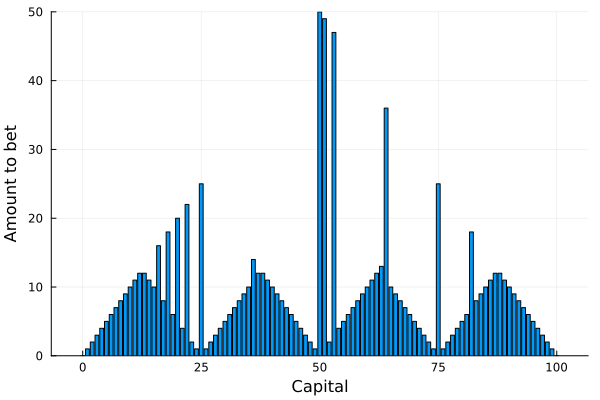

In [1]:
# example 4.3 the gambler's problem

S = collect(0:100)  # states 0 and 100 are terminal

# # value iteration for the gambler's problem.
# # V is the value function
# # π is the policy
# # ph is the probability of heads
function value_iteration(V, π, ph)

    γ = 1.0    # discount factor
    θ = 1e-6   # tolerance for convergence
    
    while true
        Δ = 0
        for s in 1:99
            v = V[s + 1]
            possible_bets = 1:min(s, 100 - s)
            q = zeros(length(possible_bets))
            
            for a in possible_bets
                q[a] = ph * (γ * V[s + a + 1]) + (1 - ph) * (γ * V[s - a + 1])
            end
            
            V[s + 1] = maximum(q)
            π[s + 1] = argmax(q)
            
            Δ = max(Δ, abs(v - V[s + 1]))
        end
        
        if Δ < θ
            break
        end
    end      
    
    
    return V, π
    # output the optimal value function and a deterministic policy
end

π = zeros(length(S))
V = zeros(length(S))  # will hold the value function
# note that zero is a (terminal) state, so if the state is s, then
# the index into V is s+1
V[101] = 1
V, π = value_iteration(V, π, 0.4)

using Plots

plot(S, V, xlabel="Capital", ylabel="Value estimates", label="")

bar(S, π, xlabel="Capital", ylabel="Amount to bet", label="")



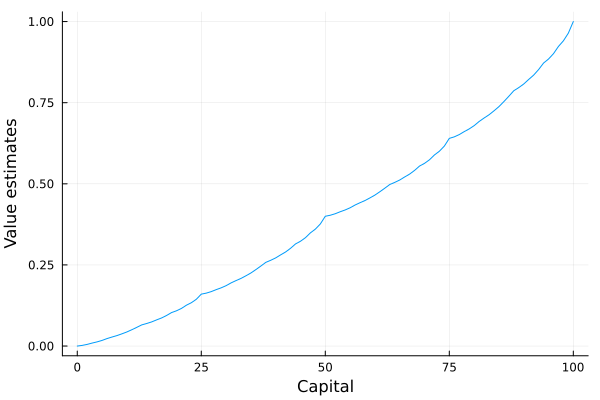

In [5]:
plot(S, V, xlabel="Capital", ylabel="Value estimates", label="")

In [26]:
println(π[52]) #julia indexing for 51
println("If you have 51 dollars, then you should bet 49 dollars. The answer is optimal because you have a 0.4 probability of winning the bet,")
println(" and the optimal policy is influenced by the probability of winning. Then, the policy is going to want to maximize the value of the next state.")
println("Also, my answer matches with what Professor England got.")

49.0


If you have 51 dollars, then you should bet 49 dollars. The answer is optimal because you have a 0.4 probability of winning the bet,
 and the optimal policy is influenced by the probability of winning. Then, the policy is going to want to maximize the value of the next state.
Also, my answer matches with what Professor England got.
